In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# K Means

In [2]:
df = pd.read_csv('./fake_data.csv')

In [5]:
# normalisation
feature_cols = list(df.columns)[1:]
for col in feature_cols:
    df[col] = (df[col] - df[col].mean())/df[col].std()

In [6]:
X = df[feature_cols].values

In [11]:
def calc_sum_square_dist(X,centroids,labels):
    def calc_square_dist(x1,x2):
        return np.sum(np.square(x1-x2))
    fin_sum = 0
    for x,l in zip(X,labels):
        fin_sum += calc_square_dist(x,centroids[l])
        
    return fin_sum/len(X)

In [14]:
k_vs_loss = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters=k).fit(X)
    label = kmeans.labels_
    centroid = kmeans.cluster_centers_
    err_loss = calc_sum_square_dist(X,centroid,label)
    k_vs_loss[k] = err_loss

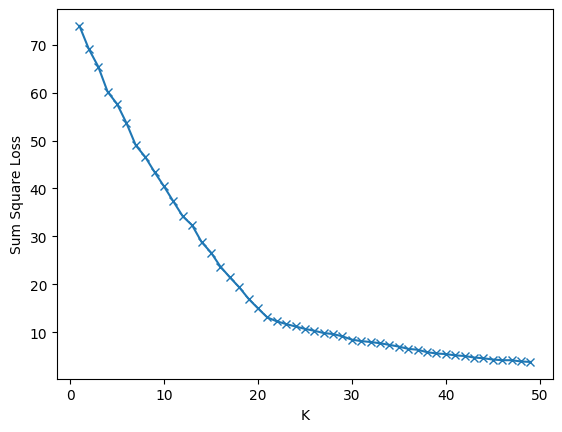

In [21]:
plt.plot(k_vs_loss.keys(),k_vs_loss.values(),'x-')
plt.xlabel('K')
plt.ylabel('Sum Square Loss')
plt.show()

# Automatic Detection of K

In [72]:
# skip the last value
loss_values = np.array(list(k_vs_loss.values()))

In [73]:
df = pd.DataFrame()
df['k'] = np.arange(len(loss_values))+1

In [74]:
df['loss'] = loss_values

In [75]:
# difference between k+1 and k of loss
delta_1 = np.insert(loss_values,0,np.nan)[:-1] - loss_values

In [76]:
df['delta_1'] = delta_1

In [77]:
# difference between k+1 and k of delta 1
delta_2 = np.insert(delta_1,0,np.nan)[:-1] - delta_1

In [78]:
df['delta_2'] = delta_2

In [79]:
# strength at k is defined as difference betwen delta 2 and delta 1 at k considering only +ve
strength = delta_2 - delta_1

# replace -ve with 0
strength[strength<0] = 0

# shift it upward
strength = np.append(strength[1:],0)


In [80]:
df['strength'] = strength

In [84]:
df.to_csv('./k_vs_loss.csv')

In [81]:
k_star = np.nanargmax(strength) + 1

In [82]:
print(f'Optimal k value is {k_star}')

Optimal k value is 21


# Model

In [85]:
kmeans = KMeans(n_clusters=k_star).fit(X)
label = kmeans.labels_
centroid = kmeans.cluster_centers_

In [91]:
data_df = pd.read_csv('./fake_data.csv')
data_df['cluster'] = label

In [93]:
data_df.to_csv('./fake_data_with_cluster.csv',index=False)

In [ ]:
data_df = pd.read_csv('./sample_users_1000.csv')
data_df['cluster'] = label
data_df.to_csv('./fake_user_cluster.csv',index=False)